# Canada Vehicle CO2 Emission Analysis

Problem Statement:

What factors have the greatest influence on CO2 emissions across various car makes and models in Canada, and, furthermore, which factors should manufacturers focus on to meet future CO2 emission limits? 

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
emissions_df = pd.read_csv("cars_CO2.csv")

In [3]:
emissions_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Cleaning

- The data consists of categorical and quantitative varaibles. 
- No missing values. 
- Renamed variables & fuel type entries to make future codes simplier. 
- Created subsets of cat_variable and num_variable.

In [4]:
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
# check data types & missing values
emissions_df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
# rename variables
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
emissions_df.rename(renamed_columns, axis='columns', inplace=True)

In [9]:
# rename fuel type entires
#X = regular gasoline
#Z = premium gasoline
#D = diesel
#E = ethanol (E85)
#N = natural gas
new_fuel_types = {
    'X':'Regular', 
    'Z':'Premium', 
    'D':'Diesel', 
    'E':'Ethanol', 
    'N':'Natural Gas'
}
emissions_df['fuel_type'] = emissions_df['fuel_type'].replace(new_fuel_types)

In [10]:
# subet categorical variables
# make, model, vehicle_class, transmission, fuel_type
cat_variables = emissions_df.select_dtypes(include='object')

In [11]:
# subset numerical
# engine_size, cylinders, fuel_cons_city, fuel_cons_hwy, fuel_cons_comb, 
# mpgfuel_cons_comb, co2
num_variables = emissions_df.select_dtypes(exclude='object')

## Exploratory Data Analysis

In [12]:
emissions_df.nunique()

make                   42
model                2053
vehicle_class          16
engine_size            51
cylinders               8
transmission           27
fuel_type               5
fuel_cons_city        211
fuel_cons_hwy         143
fuel_cons_comb        181
mpgfuel_cons_comb      54
co2                   331
dtype: int64

In [13]:
emissions_df['co2'].describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: co2, dtype: float64

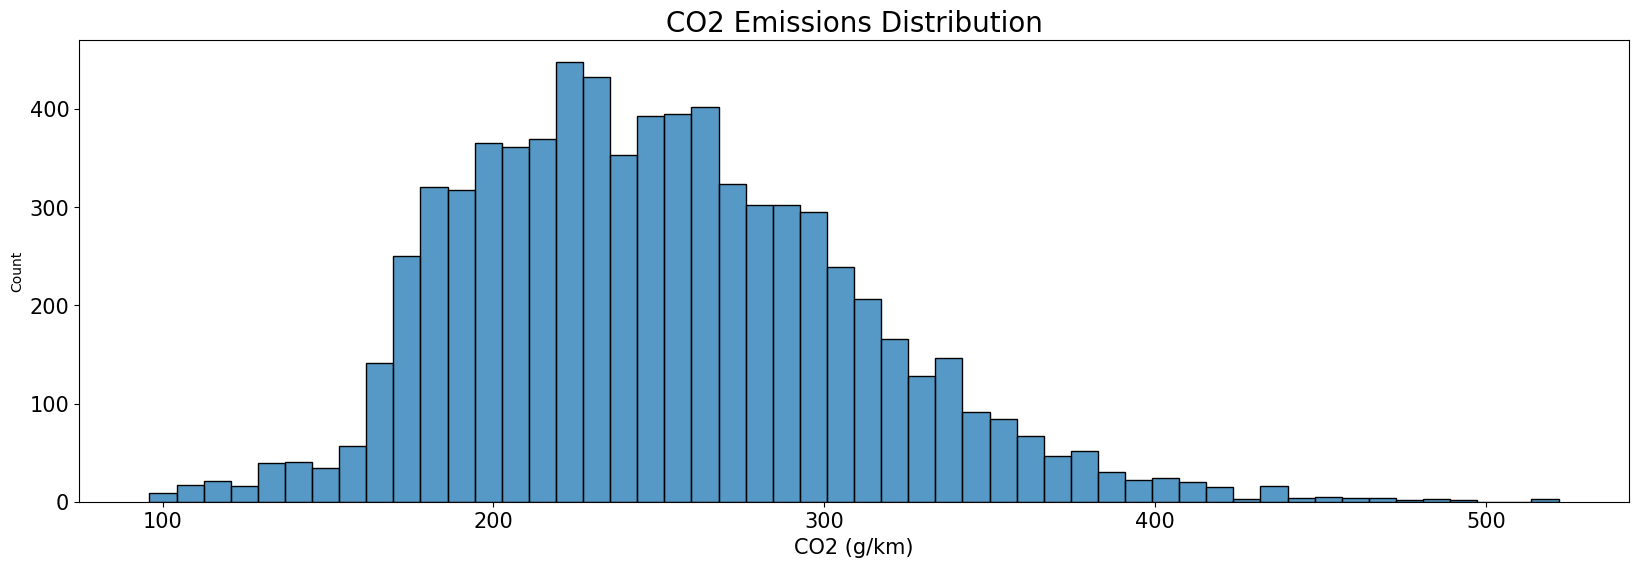

In [14]:
plt.figure(figsize=(20,6))
fig = sns.histplot(data = emissions_df, x='co2')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("CO2 Emissions Distribution", fontsize=20)
plt.xlabel("CO2 (g/km)", fontsize = 15)
plt.show()

### Check for Outliers

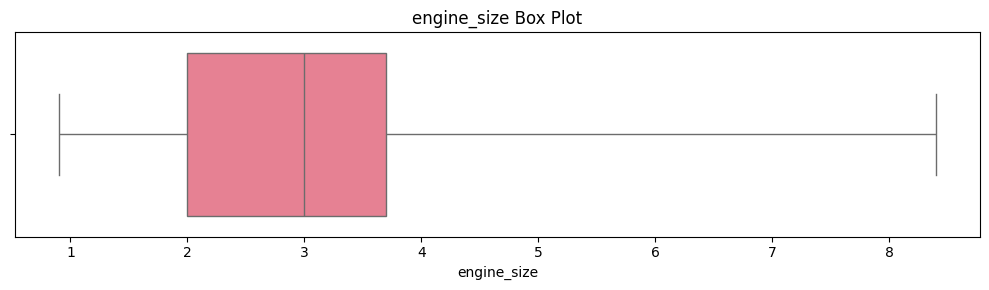

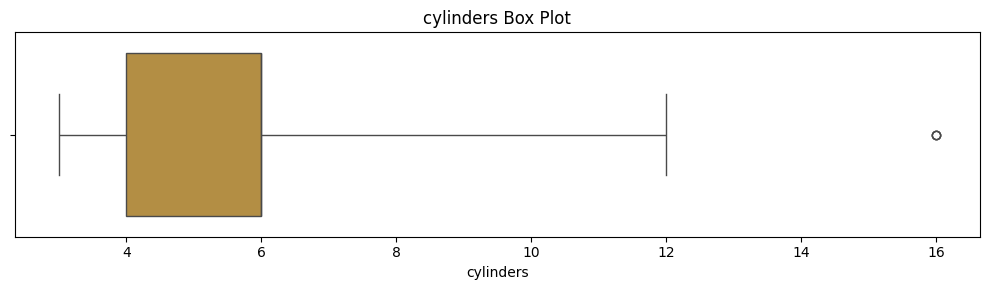

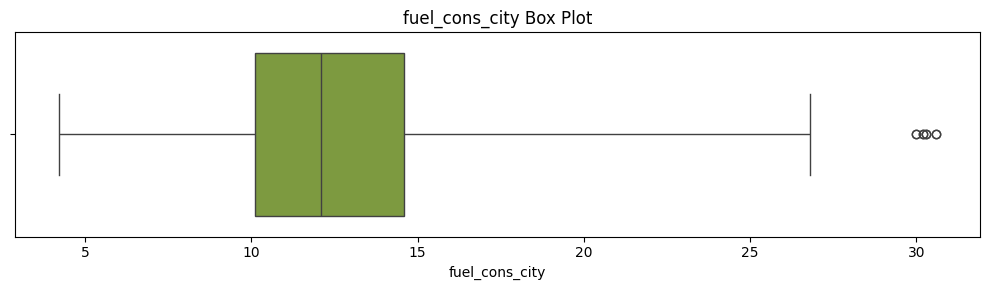

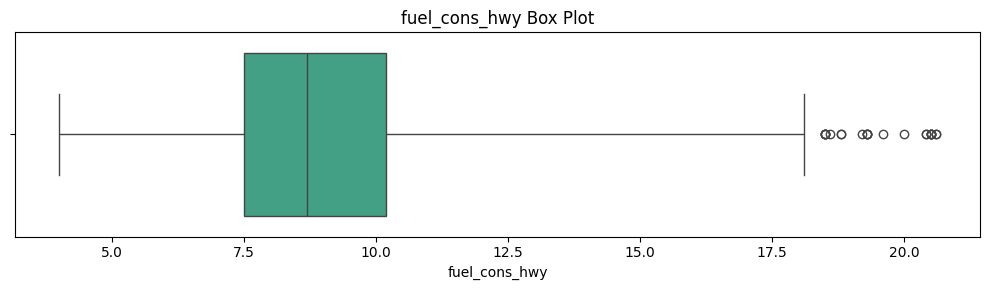

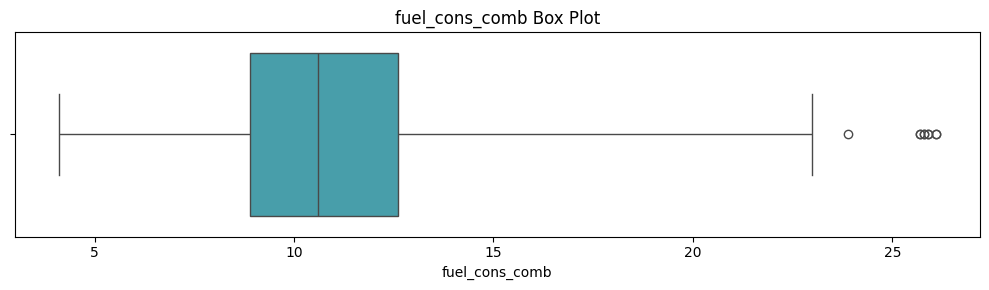

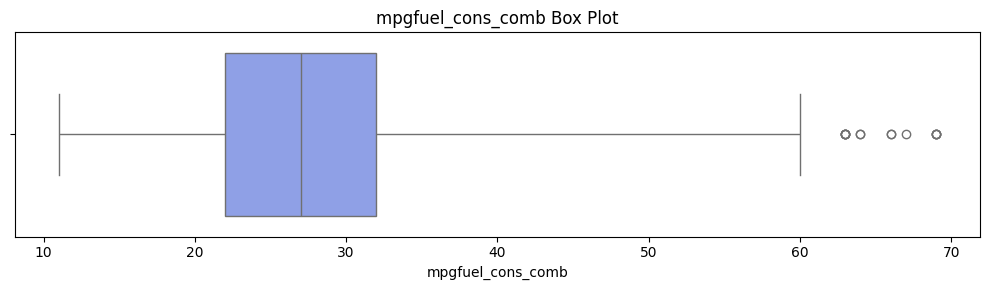

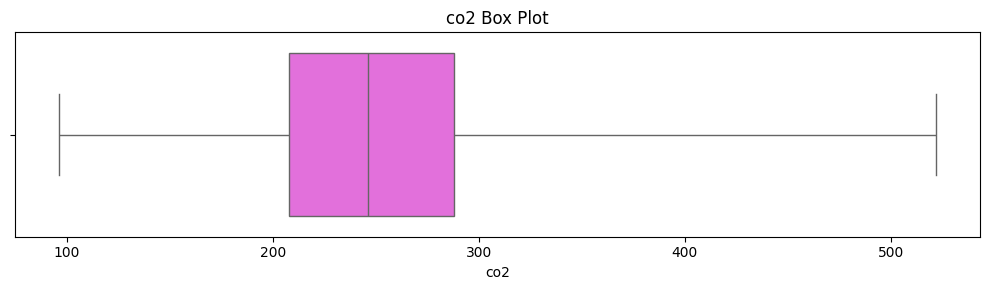

In [15]:
colors = sns.color_palette("husl", len(num_variables.columns))

for i, item in enumerate(num_variables.columns):
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=item, data=num_variables, whis=3, color=colors[i])
    plt.title(f"{item} Box Plot")
    plt.tight_layout()
    plt.savefig(f"{item}_box_plot.png")

    # Show the plot (optional)
    plt.show()


# Print or use the URL as needed
#print("Plotly graph URL:", url)


#### Outliers
Outliers appear in 
- cylinders
- fuel_cons_city
- fuel_cons_hwy
- fuel_cons_comb
- mpgfuel_cons_comb

* will check to see if outliers chanhe correlation coefficients 

#### Catagorical Variables EDA

In [17]:
make_df = emissions_df['make'].value_counts(ascending=False).reset_index()
model_df = emissions_df['model'].value_counts(ascending=False).reset_index()
class_df = emissions_df['vehicle_class'].value_counts(ascending=False).reset_index()
transmission_df = emissions_df['transmission'].value_counts(ascending=False).reset_index()
fuel_df = emissions_df['fuel_type'].value_counts(ascending=False).reset_index()
cylinders_df = emissions_df['cylinders'].value_counts(ascending=False).reset_index()

In [18]:
emissions_df['transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [19]:
emissions_df["transmission"] = np.where(emissions_df["transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", emissions_df["transmission"])
emissions_df["transmission"] = np.where(emissions_df["transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", emissions_df["transmission"])
emissions_df["transmission"] = np.where(emissions_df["transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", emissions_df["transmission"])
emissions_df["transmission"] = np.where(emissions_df["transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", emissions_df["transmission"])
emissions_df["transmission"] = np.where(emissions_df["transmission"].isin(["M5", "M6", "M7"]), "Manual", emissions_df["transmission"])

In [20]:
transmission_df = emissions_df['transmission'].value_counts(ascending=False).reset_index()
transmission_df.head()

,transmission,count
0,Automatic with Select Shift,3127
1,Automatic,1851
2,Manual,1185
3,Automated Manual,646
4,Continuously Variable,576


In [21]:
def plot_bar_count(data, x_column, title, x_label, y_label):
    plt.figure(figsize=(20, 5))
    fig = sns.barplot(data=data, x=x_column, y='count', hue=x_column,\
                  palette='plasma', legend=False)
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=15)
    plt.xticks(rotation = 75, fontsize = 15)
    plt.ylabel(y_label, fontsize=15)
    plt.bar_label(fig.containers[0], fontsize=15)
    plt.show()

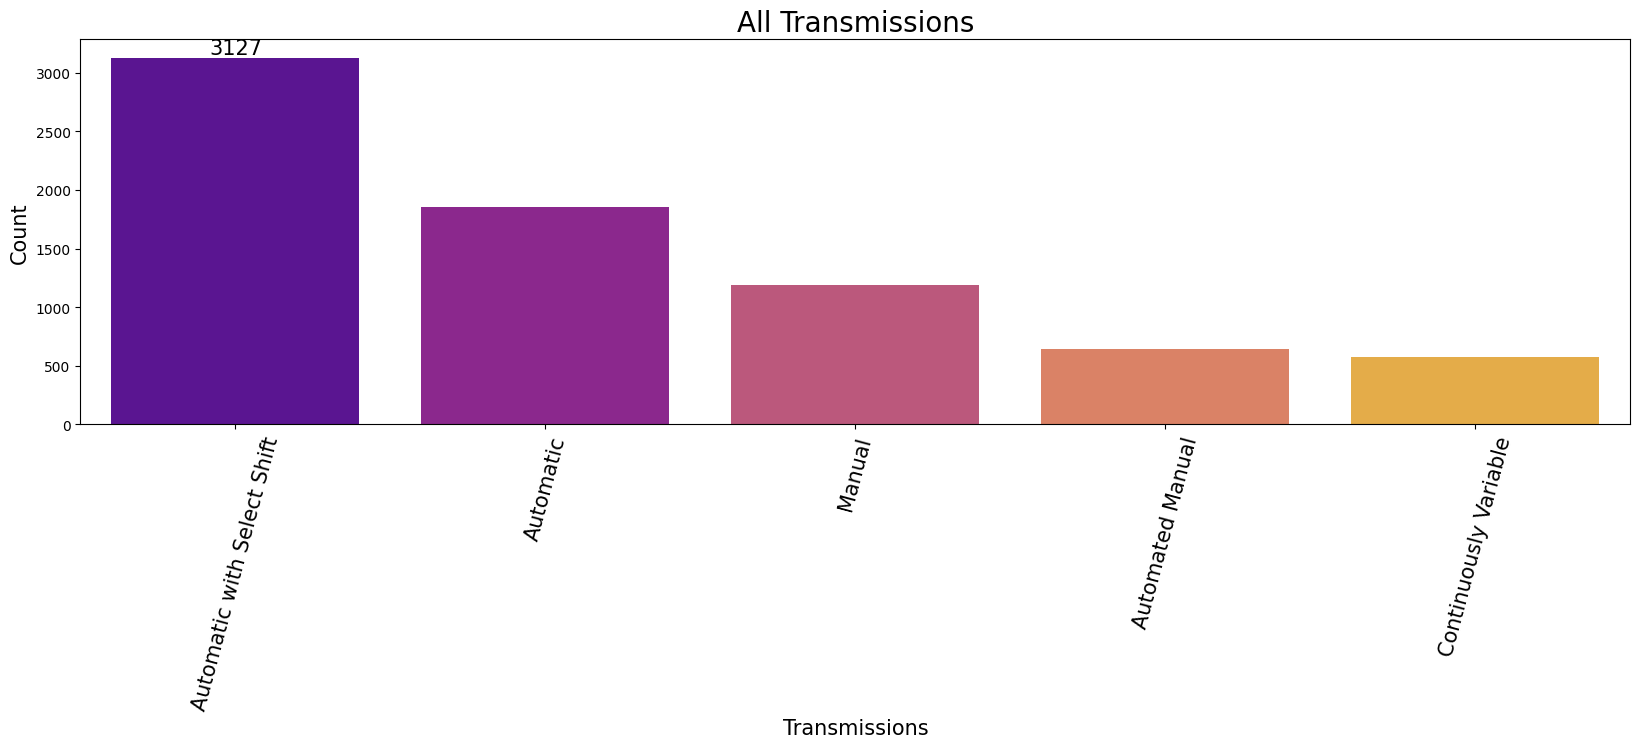

In [22]:
plot_bar_count(transmission_df,
               transmission_df['transmission'],
               'All Transmissions', 
               'Transmissions',
              'Count')

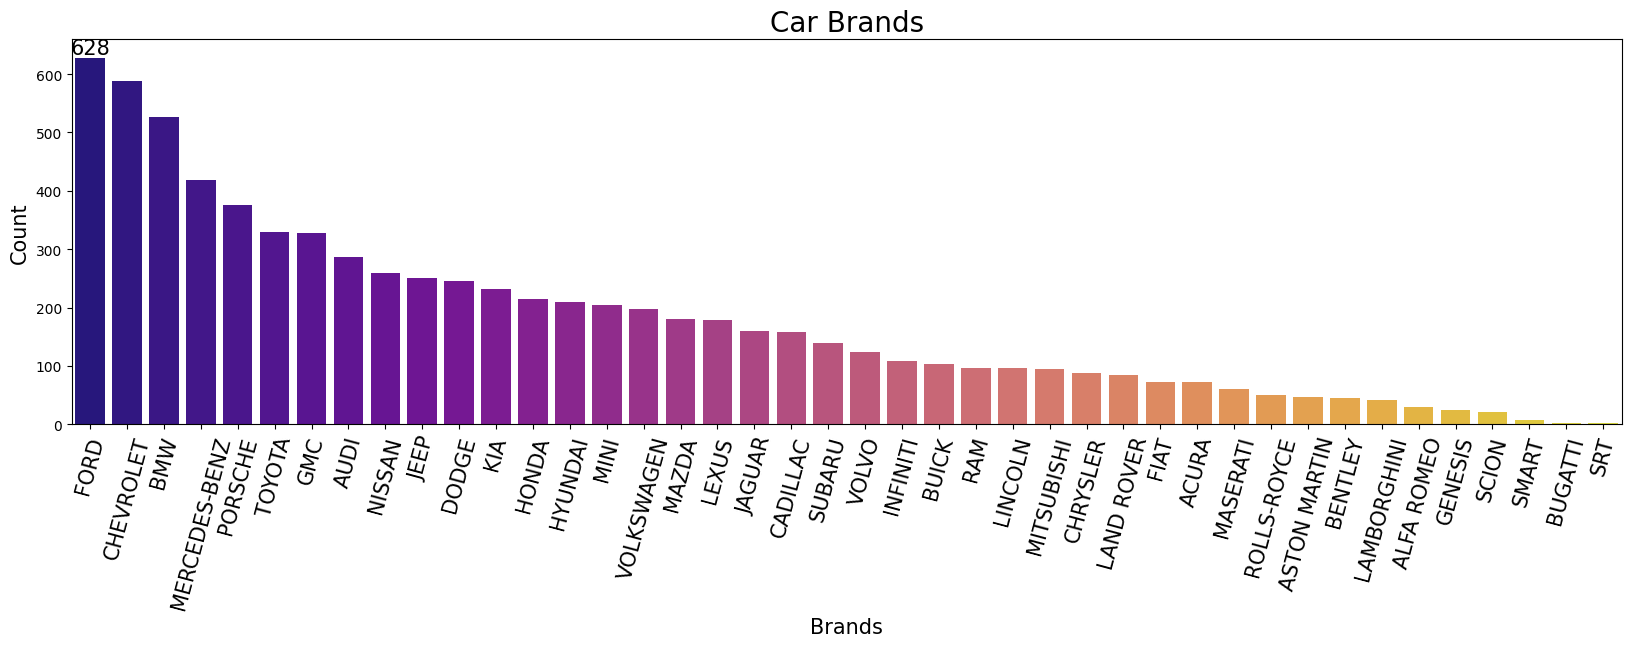

In [23]:
plot_bar_count(make_df,
               make_df['make'],
               'Car Brands', 
               'Brands',
              'Count')

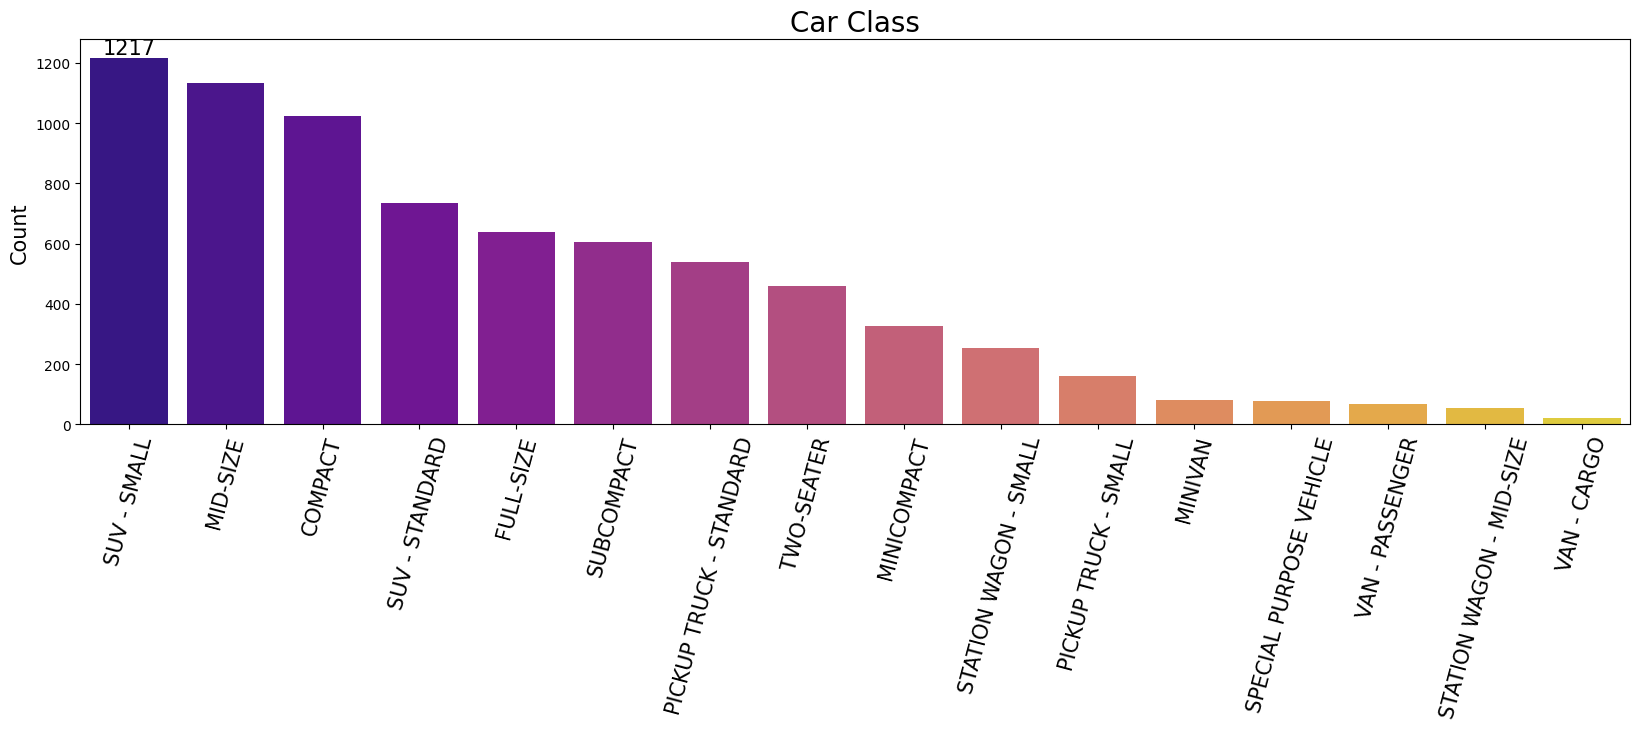

In [24]:
plot_bar_count(class_df,
               class_df['vehicle_class'],
               'Car Class', 
               '',
              'Count')

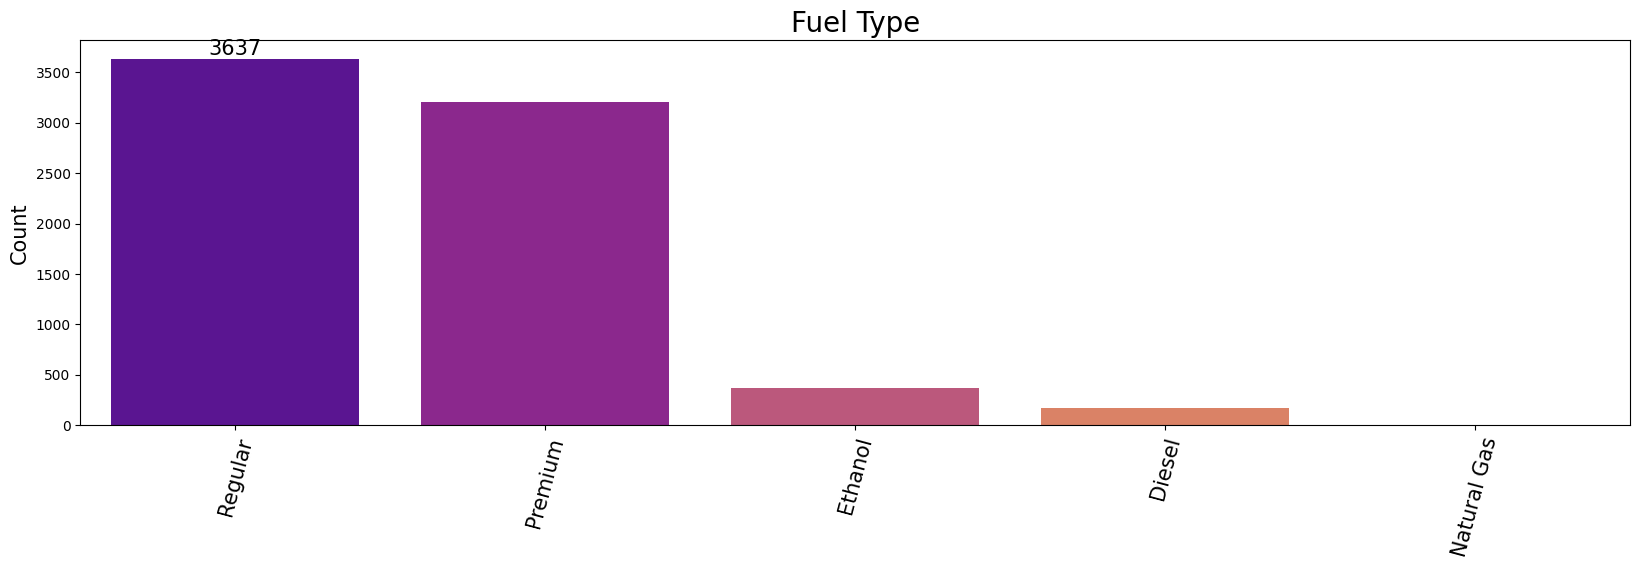

In [25]:
plot_bar_count(fuel_df,
               fuel_df['fuel_type'],
               'Fuel Type', 
               '',
              'Count')

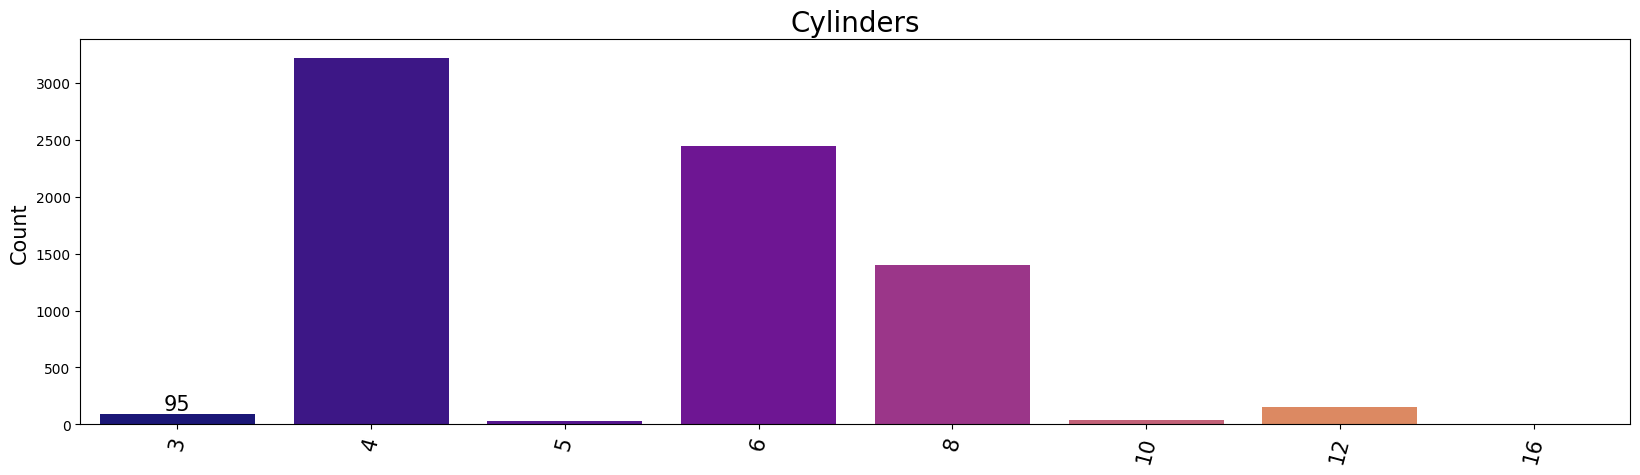

In [26]:
plot_bar_count(cylinders_df,
               cylinders_df['cylinders'],
               'Cylinders', 
               '',
              'Count')

#### Numerical Variables EDA

In [27]:
emissions_df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


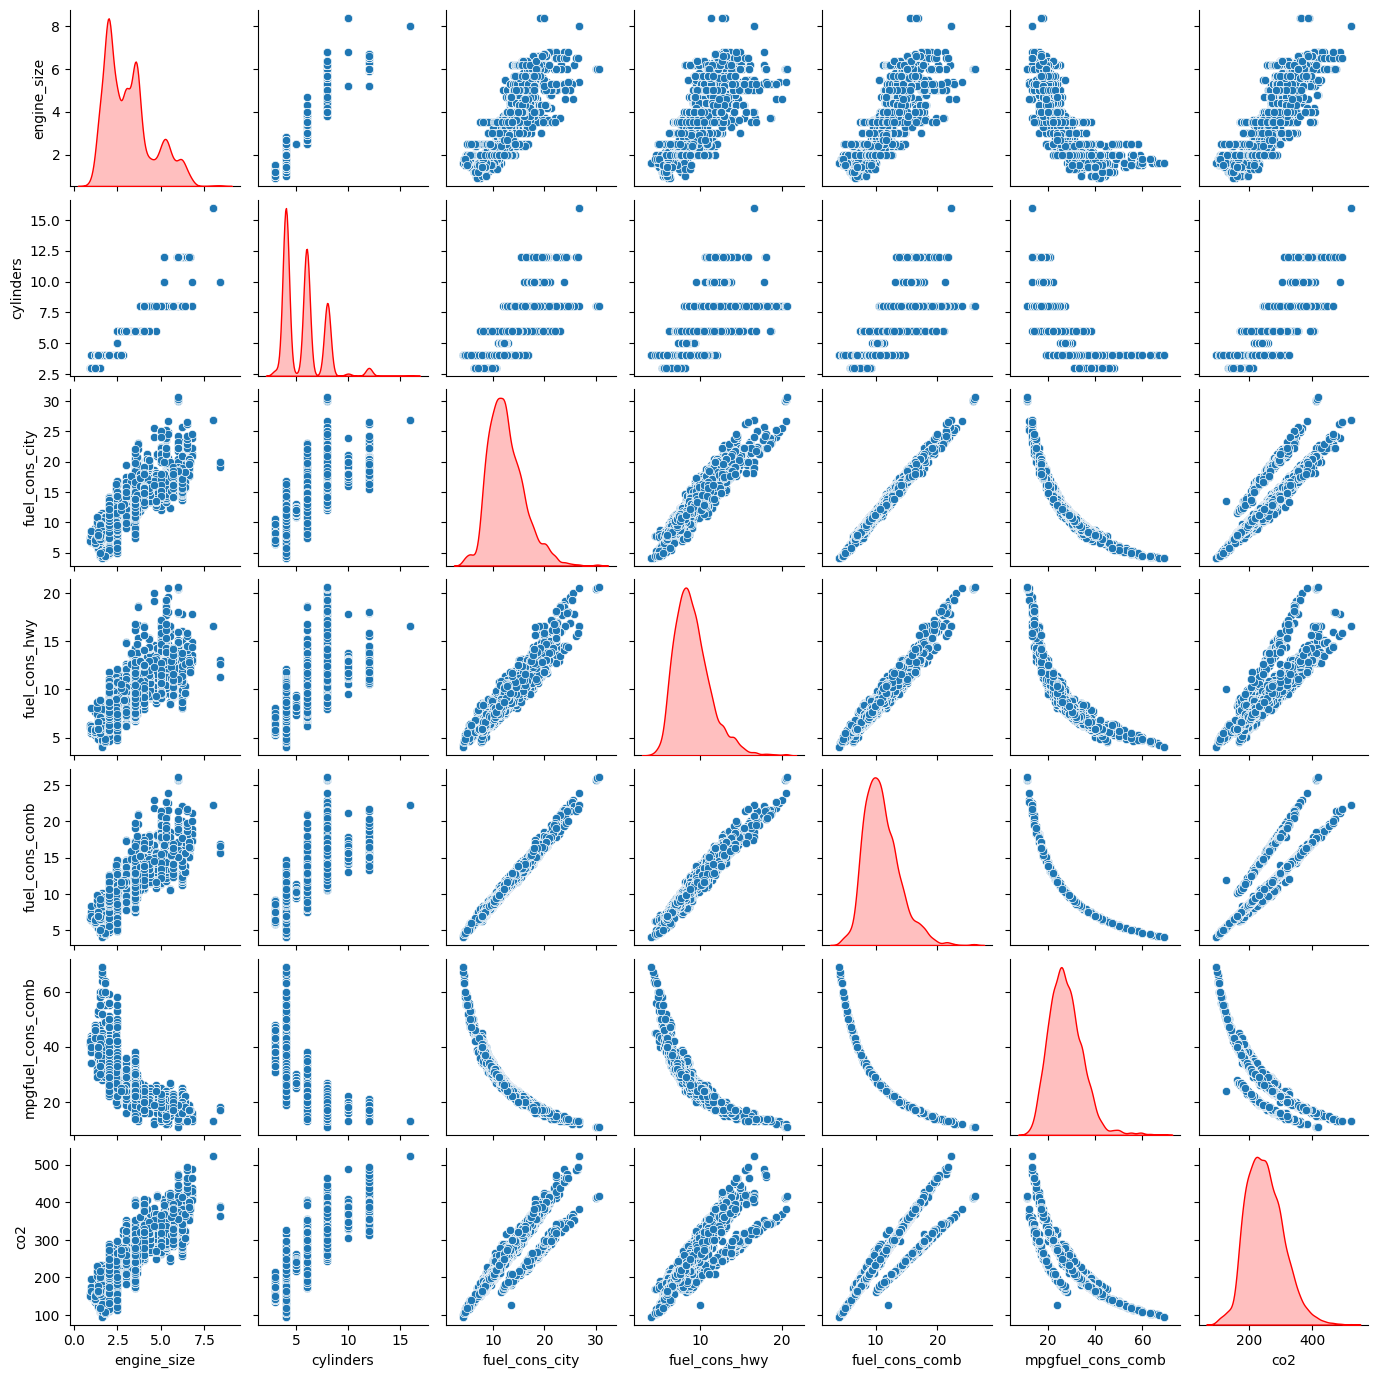

In [28]:
pair = sns.pairplot(emissions_df, height=2, diag_kind = "kde", diag_kws={"color":"red"})

### Correlation Analysis

In [29]:
correlation_matrix = num_variables.corr()

# Extract correlation coefficients for 'co2' variable
co2_correlations = correlation_matrix['co2']

# Print the correlation coefficients
correlation_matrix['co2']

engine_size          0.851145
cylinders            0.832644
fuel_cons_city       0.919592
fuel_cons_hwy        0.883536
fuel_cons_comb       0.918052
mpgfuel_cons_comb   -0.907426
co2                  1.000000
Name: co2, dtype: float64

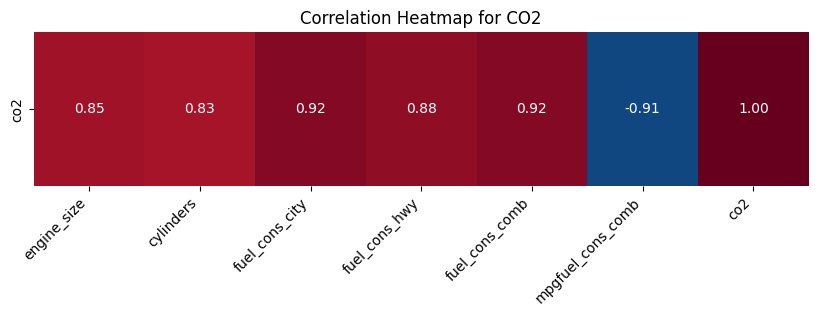

In [30]:
co2_correlations = num_variables.corr()['co2']

# Create a DataFrame containing only the 'co2' correlations
co2_correlations_df = pd.DataFrame(co2_correlations).transpose()

# Create a heatmap for 'co2' correlations with rotated x-axis labels
plt.figure(figsize=(10, 2))
heatmap = sns.heatmap(co2_correlations_df, annot=True, cmap="RdBu_r", vmin=-1, vmax=1, fmt=".2f", cbar=False)

# Rotate x-axis labels by 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.title("Correlation Heatmap for CO2")
plt.savefig('co2_correlation_heatmap.png', bbox_inches='tight')

plt.show()


### Filter out outliers 
Filter out outliers that are outside 3 standad deviations

In [31]:
from scipy import stats
# Specify the threshold for Z-score beyond which a data point is considered an outlier
z_threshold = 3

# Compute the Z-scores for each variable in the DataFrame
z_scores = stats.zscore(num_variables)

# Create a boolean mask indicating whether each data point is an outlier
outlier_mask = (abs(z_scores) > z_threshold).any(axis=1)

# Filter the DataFrame to exclude outliers
numerical_no_outliers = num_variables[~outlier_mask]

# Optionally, you can also get a DataFrame containing only the outliers
numerical_outliers_only = num_variables[outlier_mask]

In [32]:
numerical_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7047.0,3.076529,1.257293,0.9,2.0,3.0,3.6,6.8
cylinders,7047.0,5.463460,1.563508,3.0,4.0,6.0,6.0,10.0
fuel_cons_city,7047.0,12.357329,3.033214,5.4,10.1,12.0,14.3,22.3
fuel_cons_hwy,7047.0,8.916943,1.956350,4.5,7.5,8.6,10.0,15.7
fuel_cons_comb,7047.0,10.809508,2.515589,5.8,8.9,10.5,12.4,19.3
mpgfuel_cons_comb,7047.0,27.507734,6.261264,15.0,23.0,27.0,32.0,49.0
co2,7047.0,247.696750,51.712975,128.0,208.0,244.0,284.0,421.0


In [33]:
numerical_no_outliers.corr()

# Old: 0.851145	0.832644	0.919592	0.883536	0.918052	-0.907426	1.000000
# New: 0.835664	0.827591	0.908119	0.884306	0.912168	-0.923830	1.000000

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.934107,0.821131,0.752383,0.808217,-0.781500,0.835664
cylinders,0.934107,1.000000,0.804785,0.727515,0.788688,-0.767360,0.827591
fuel_cons_city,0.821131,0.804785,1.000000,0.941403,0.992866,-0.955621,0.908119
fuel_cons_hwy,0.752383,0.727515,0.941403,1.000000,0.974490,-0.925651,0.884306
fuel_cons_comb,0.808217,0.788688,0.992866,0.974490,1.000000,-0.958156,0.912168
mpgfuel_cons_comb,-0.781500,-0.767360,-0.955621,-0.925651,-0.958156,1.000000,-0.923830
co2,0.835664,0.827591,0.908119,0.884306,0.912168,-0.923830,1.000000


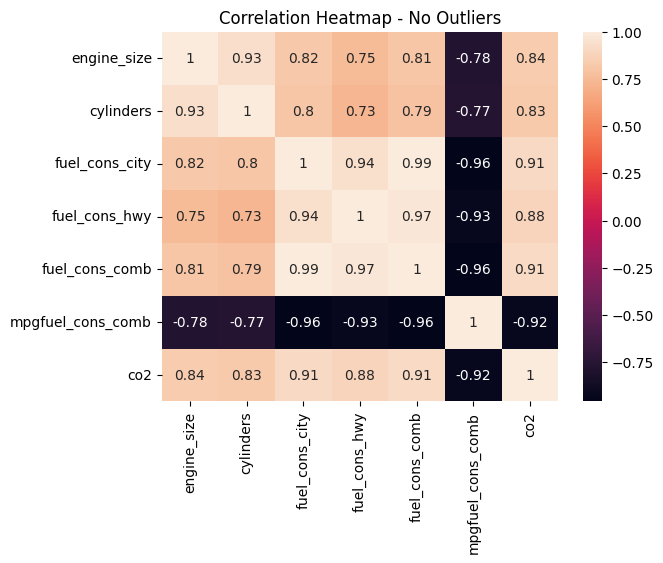

In [34]:
_ = sns.heatmap(numerical_no_outliers.corr(), annot = True)

plt.title("Correlation Heatmap - No Outliers")
plt.show()

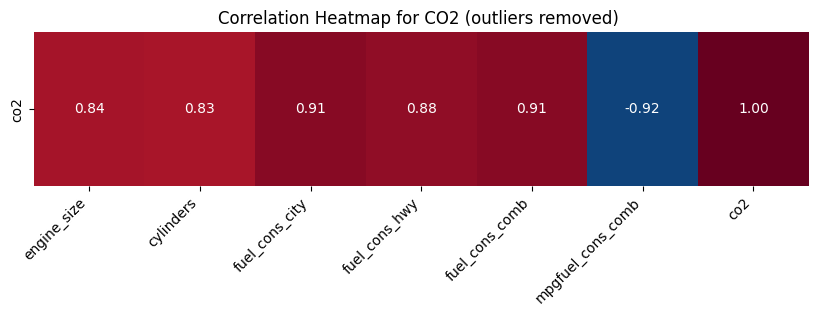

In [35]:
co2_corr_no_outliers = numerical_no_outliers.corr()['co2']

# Create a DataFrame containing only the 'co2' correlations
co2_corr_no_outliers_df = pd.DataFrame(co2_corr_no_outliers).transpose()

# Create a heatmap for 'co2' correlations with rotated x-axis labels
plt.figure(figsize=(10, 2))
heatmap = sns.heatmap(co2_corr_no_outliers_df, annot=True, cmap="RdBu_r", vmin=-1, vmax=1, fmt=".2f", cbar=False)

# Rotate x-axis labels by 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.title("Correlation Heatmap for CO2 (outliers removed) ")
plt.savefig('co2_correlation_heatmap_no_outliers.png', bbox_inches='tight')

plt.show()

Filtering out the outliers does significantly change some of the correlations.

engine_size	cylinders	fuel_cons_city	fuel_cons_hwy	fuel_cons_comb	mpgfuel_cons_comb	co2
- Old: 0.851145	0.832644	0.919592	0.883536	0.918052	-0.907426	1.000000
- New: 0.835664	0.827591	0.908119	0.884306	0.912168	-0.923830	1.000000


### Model Building

* Join filtered dataset with no outliers to original and drop old columns with outliers. 
* Build an OLS Regression for the original dataset and the dataset with no outliers. The constants & P-values significantly changed. Moving forward we will only use the dataframe numerical_no_outliers. 

In [36]:
emissions_df.reset_index()
#7385 rows × 13 columns
emissions_df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [37]:
numerical_no_outliers.reset_index()
#7047 rows × 8 columns
numerical_no_outliers.columns

Index(['engine_size', 'cylinders', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [38]:
#join numerical_no_outliers to emissions_df
# cut old numerical columns 
#DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', 
#               sort=False, validate=None)[source]
no_outliers_all = emissions_df.join(numerical_no_outliers, on = None,
                                     how='inner', lsuffix='_old', rsuffix='_new')

In [39]:
no_outliers_all.columns

Index(['make', 'model', 'vehicle_class', 'engine_size_old', 'cylinders_old',
       'transmission', 'fuel_type', 'fuel_cons_city_old', 'fuel_cons_hwy_old',
       'fuel_cons_comb_old', 'mpgfuel_cons_comb_old', 'co2_old',
       'engine_size_new', 'cylinders_new', 'fuel_cons_city_new',
       'fuel_cons_hwy_new', 'fuel_cons_comb_new', 'mpgfuel_cons_comb_new',
       'co2_new'],
      dtype='object')

In [40]:
filtered_variables = no_outliers_all[['make', 'model', 'vehicle_class', 
       'transmission', 'fuel_type', 
       'engine_size_new', 'cylinders_new', 'fuel_cons_city_new',
       'fuel_cons_hwy_new', 'fuel_cons_comb_new', 'mpgfuel_cons_comb_new',
       'co2_new']]
renamed_columns = {
    'engine_size_new':'engine_size', 
    'cylinders_new': 'cylinders',
    'fuel_cons_city_new': 'fuel_cons_city',
    'fuel_cons_hwy_new': 'fuel_cons_hwy',
    'fuel_cons_comb_new': 'fuel_cons_comb',
    'mpgfuel_cons_comb_new': 'mpgfuel_cons_comb',
    'co2_new': 'co2' }
filtered_variables.rename(renamed_columns, axis='columns', inplace=True)
filtered_variables.head()

/var/folders/t_/z7_qb0ts63343ljjn76rkdcw0000gp/T/ipykernel_4571/2838839356.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,make,model,vehicle_class,transmission,fuel_type,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,Automatic with Select Shift,Premium,2.0,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,Manual,Premium,2.4,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,Continuously Variable,Premium,1.5,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,Automatic with Select Shift,Premium,3.5,6,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,Automatic with Select Shift,Premium,3.5,6,12.1,8.7,10.6,27,244


In [41]:
from statsmodels.formula.api import ols
x = filtered_variables[['engine_size', 'cylinders', 'fuel_cons_city',\
                  'fuel_cons_hwy', 'fuel_cons_comb', 'mpgfuel_cons_comb'\
                 ]]
y = filtered_variables['co2']
# add constant column of 1 to indep var
x=sm.add_constant(x)

# store and fit model
regression_model = sm.OLS(y,x).fit()
# print regression model summary 
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     9929.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:48:34   Log-Likelihood:                -29886.
No. Observations:                7047   AIC:                         5.979e+04
Df Residuals:                    7040   BIC:                         5.983e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               308.0639      6.09

In [42]:
from statsmodels.api import add_constant, OLS

# Define independent variables
independent_vars = ['engine_size', 'cylinders', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'mpgfuel_cons_comb']
X = add_constant(filtered_variables[independent_vars])

# Define the dependent variable
y = filtered_variables['co2']

# Fit the OLS regression model
model = OLS(y, X).fit()

# Extract and print only the p-values
p_values = model.pvalues
print('P Values for Strongly Correlated Variables:', p_values)



P Values for Strongly Correlated Variables: const                0.000000e+00
engine_size          4.059890e-32
cylinders            2.931415e-63
fuel_cons_city       1.912694e-01
fuel_cons_hwy        6.128795e-02
fuel_cons_comb       5.581759e-01
mpgfuel_cons_comb    0.000000e+00
dtype: float64


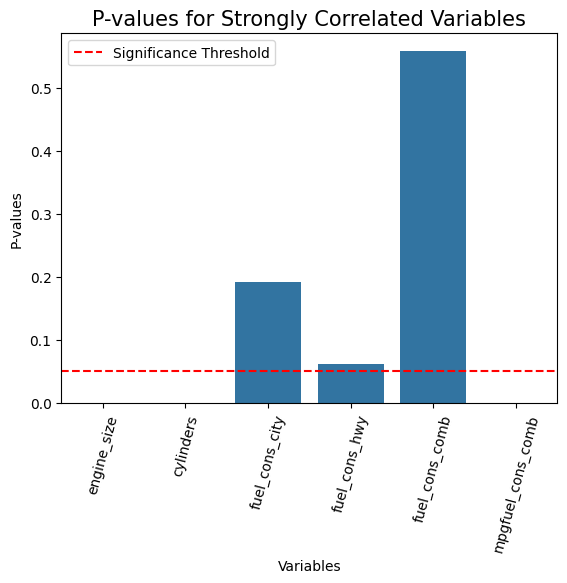

In [51]:
df = pd.DataFrame({'Variable': variable_names, 'P_Value': p_values})


fig = sns.barplot(data=df, x='Variable', y='P_Value', legend=False)
plt.title('P-values for Strongly Correlated Variables', fontsize=15)
plt.xlabel('Variables', fontsize=10)
plt.xticks(rotation=75, fontsize=10)
plt.ylabel('P-values', fontsize=10)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold')
plt.legend()
plt.show()

**P-vlaue >0.05:**
- fuel_cons_city
- fuel_cons_hwy
- fuel_cons_comb

Fail to reject the null hypothesis. This indicates that there isn't enough evidence to conclude that the coefficients for these variables are different from zero. In other words, these variables may not be statistically significant predictors of CO2 emissions in your model.

**P-value < 0.05:** 
- engine size
- cylinders
- mpgfuel_cons_comb

Reject the null hypothesis. There is evidence to suggest that these variables are likely to have a statistically significant effect on the response variable (CO2 emissions). 

### Create CO2 ranges and co2_range variable
- low_co2 < 150
- medium_co2 [150, 250]
- high_co2 > 250

In [52]:
bins = [0, 150, 250, float('inf')] 
labels = ['low_co2', 'medium_co2', 'high_co2']

# Create a new column 'co2_range' with the corresponding bin labels
filtered_variables.loc[:, 'co2_range'] = pd.cut(filtered_variables['co2'], bins=bins, labels=labels, right=False)

# Split the DataFrame into subsets based on CO2 ranges
low_co2_subset = filtered_variables[filtered_variables['co2_range'] == 'low_co2'].copy()
medium_co2_subset = filtered_variables[filtered_variables['co2_range'] == 'medium_co2'].copy()
high_co2_subset = filtered_variables[filtered_variables['co2_range'] == 'high_co2'].copy()

# check subset
low_co2_subset


/var/folders/t_/z7_qb0ts63343ljjn76rkdcw0000gp/T/ipykernel_4571/2890859778.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,make,model,vehicle_class,transmission,fuel_type,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2,co2_range
2,ACURA,ILX HYBRID,COMPACT,Continuously Variable,Premium,1.5,4,6.0,5.8,5.9,48,136,low_co2
342,FORD,C-MAX HYBRID,FULL-SIZE,Continuously Variable,Regular,2.0,4,5.6,6.4,6.0,47,138,low_co2
494,HONDA,CR-Z,TWO-SEATER,Continuously Variable,Regular,1.5,4,6.6,6.0,6.3,45,145,low_co2
515,HYUNDAI,SONATA HYBRID,MID-SIZE,Automatic with Select Shift,Regular,2.4,4,6.5,5.9,6.2,46,143,low_co2
516,HYUNDAI,SONATA HYBRID LIMITED,MID-SIZE,Automatic with Select Shift,Regular,2.4,4,6.6,5.9,6.3,45,145,low_co2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,FORD,Escape Hybrid,SUV - SMALL,Continuously Variable,Regular,2.5,4,5.4,6.3,5.8,49,136,low_co2
6787,FORD,Escape Hybrid AWD,SUV - SMALL,Continuously Variable,Regular,2.5,4,5.5,6.4,5.9,48,139,low_co2
7111,LEXUS,UX 250h AWD,COMPACT,Continuously Variable,Regular,2.0,4,5.7,6.2,6.0,47,140,low_co2
7213,MITSUBISHI,Mirage,COMPACT,Continuously Variable,Regular,1.2,3,6.6,5.6,6.2,46,143,low_co2


In [53]:
numerical_no_outliers.to_csv('numerical_no_outliers.csv', index=False)

filtered_variables.to_csv('filtered_variables.csv', index=False)

## Insights

In [54]:
filtered_variables[filtered_variables['co2_range']=='low_co2'].describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,63.0,1.903175,0.523317,1.0,1.3,2.0,2.4,2.5
cylinders,63.0,3.761905,0.429339,3.0,4.0,4.0,4.0,4.0
fuel_cons_city,63.0,6.295238,1.060497,5.4,5.7,6.2,6.6,13.6
fuel_cons_hwy,63.0,6.020635,0.588919,5.3,5.7,6.0,6.2,10.0
fuel_cons_comb,63.0,6.180952,0.773734,5.8,5.9,6.0,6.3,12.0
mpgfuel_cons_comb,63.0,46.174603,3.280144,24.0,45.0,47.0,48.0,49.0
co2,63.0,141.047619,4.559388,128.0,138.0,140.0,145.0,149.0


### Low CO2 Emissions (CO2 < 150 g/km)
To reach low co2 emissions manufacturers should focus on 
- engine size < 2.5 L
- cylinders < 4
- fuel consumption combined (mpg) range: [24, 49]

In [55]:
filtered_variables[filtered_variables['co2_range']=='medium_co2'].describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,3728.0,2.239753,0.630158,0.9,2.0,2.0,2.5,5.5
cylinders,3728.0,4.405311,0.845857,3.0,4.0,4.0,4.0,8.0
fuel_cons_city,3728.0,10.293160,1.625525,6.6,9.1,10.3,11.3,17.6
fuel_cons_hwy,3728.0,7.597479,1.034922,4.5,6.9,7.6,8.3,12.7
fuel_cons_comb,3728.0,9.079453,1.314815,6.3,8.2,9.1,9.9,15.0
mpgfuel_cons_comb,3728.0,31.705204,4.403484,19.0,29.0,31.0,34.0,45.0
co2,3728.0,209.532189,24.507120,150.0,191.0,211.0,230.0,249.0


### Medium CO2 Emissions (CO2 [150, 250] g/km)
To stay within medium co2 emissions manufacturers should focus on:  
- engine size < 5.5 L
- cylinders < 8
- fuel consumption combined (mpg) range: [19, 45]


## Visualizations

### Statistically Significant Variables
- Engine Size
- Number of Cylinders
- Fuel Consumption Combined (mpg)

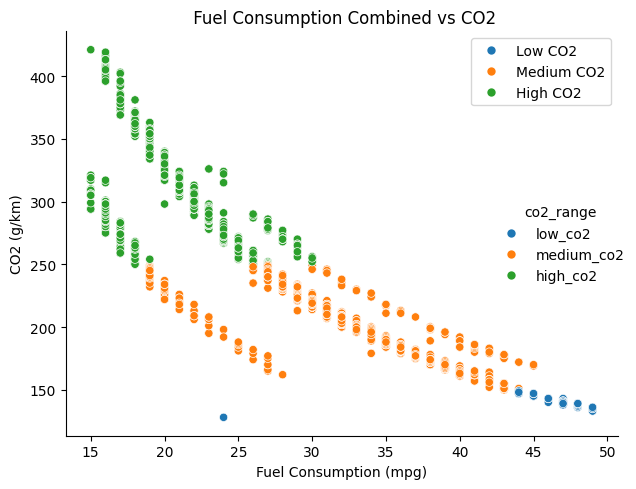

In [56]:
# seaborn graph
sns.relplot(x='mpgfuel_cons_comb', y='co2', data=filtered_variables,hue='co2_range')
plt.legend(title='CO2 Range')

# Customize the legend entries
legend_labels = ['Low CO2', 'Medium CO2', 'High CO2']
for i, text in enumerate(plt.legend().get_texts()):
    text.set_text(legend_labels[i])
plt.title(" Fuel Consumption Combined vs CO2")
plt.xlabel('Fuel Consumption (mpg)')
plt.ylabel('CO2 (g/km)')
plt.tight_layout()
plt.savefig('fuel_consumption_vs_co2.png')
plt.show()

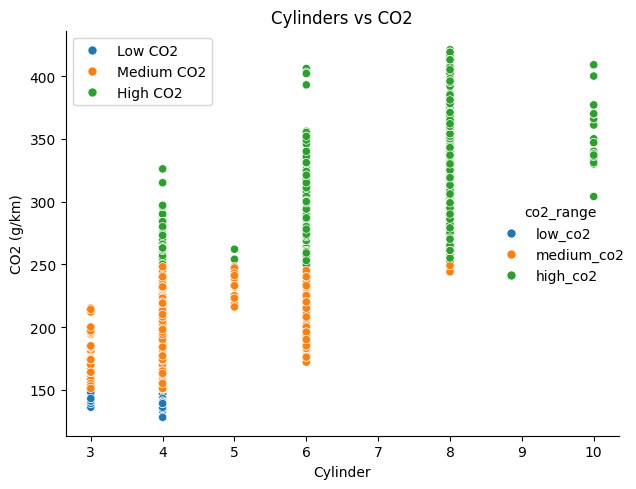

In [57]:
# seaborn graph
sns.relplot(x='cylinders', y='co2', data=filtered_variables, hue='co2_range')
plt.legend(title='CO2 Range')

# Customize the legend entries
legend_labels = ['Low CO2', 'Medium CO2', 'High CO2']
for i, text in enumerate(plt.legend().get_texts()):
    text.set_text(legend_labels[i])
plt.title("Cylinders vs CO2")
plt.xlabel('Cylinder')
plt.ylabel('CO2 (g/km)')
plt.tight_layout()
plt.savefig('cylinder_vs_co2.png')
plt.show()

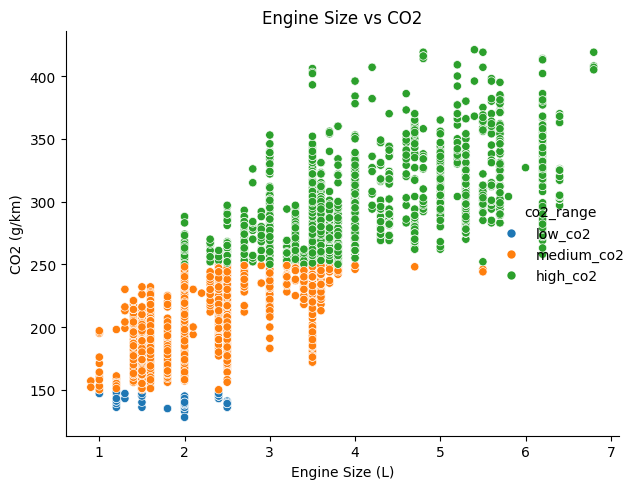

In [58]:
# Your relplot code without the automatic legend
sns.relplot(x='engine_size', y='co2', data=filtered_variables, hue='co2_range')
plt.title("Engine Size vs CO2")
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 (g/km)')
plt.tight_layout()
plt.savefig('engine_size_vs_co2.png')
plt.show()

In [59]:
import plotly.express as px
from plotly.offline import plot

df = filtered_variables
fig = px.scatter(df, x='mpgfuel_cons_comb', y='co2', color='co2_range',
                 labels={
                     'mpgfuel_cons_comb':'Fuel Consumption Combined (mpg)',
                     'co2':'CO2 Emissions',
                     'co2_range':'CO2 Range',
                     'low_co2':'low',
                     'medium_co2':'medium'
                 },
                title="Fuel Consumption Combined vs CO2 Emissions")
fig.update_layout(
    title={
        'text': "Fuel Consumption Combined vs CO2 Emissions",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


# Save the figure as an HTML file without opening it
plt.savefig('fuel_consumption.png')


/Users/amy.leaver/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 640x480 with 0 Axes>

In [60]:
def url_to_iframe(url, text=True):
    html = ''
    # style
    html += '''<head>
    <style>
    div.textbox {
        margin: 30px;
        font-weight: bold;
    }
    </style>
    </head>'
    '''
    # iframe
    html += '<iframe src=' + url + '.embed#{} width=750 height=400 frameBorder="0"></iframe>'
    if text:
        html += '''<body>
        <div class="textbox">
            <p>Click on the presentation above and use left/right arrow keys to flip through the slides.</p>
        </div>
        </body>
        '''
    return html


In [64]:
fig = px.scatter(filtered_variables, x='cylinders', y='co2', color='co2_range',\
                title='Cylinders vs CO2 Emissions')
fig.show()
fig.write_html("cylinders_vs_co2.html")

/Users/amy.leaver/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [65]:
fig = px.scatter(filtered_variables, x='engine_size', y='co2', color='co2_range',\
                title='Engine Size vs CO2 Emissions')
fig.show()
fig.write_html("engine_size_vs_co2.html")

/Users/amy.leaver/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Categorical Variables vs CO2 Emissions

In [66]:
fig = px.pie(filtered_variables, values='co2', names='fuel_type', title='CO2 Emissions by Fuel Type')
fig.show()


In [67]:
filtered_variables.columns
fig = px.pie(filtered_variables, values='co2', names='vehicle_class', title='Title')
fig.show()